In [21]:
#Tamim Mahmud from Daffodil International University
#21/06/2025


Activation Function হলো একটা গেট, যা নির্ধারণ করে একটি নিউরন “Active হবে নাকি হবে না।”

এটি input-এর উপর একটা গণিতীয় ফাংশন apply করে।

🔍 কেন দরকার?

Deep Learning Model এ যদি activation function না দিই, তাহলে model কেবল linear কাজ করতে পারবে।


অথচ বাস্তবে অনেক কিছুই non-linear (যেমন, image, sound, emotion, survival prediction ইত্যাদি)।

তাই আমাদের Non-linearity দরকার — এই কাজটাই করে Activation Function।



In [22]:
#ReLU (Rectified Linear Unit)
#used in -> Deep Networks, CNN

import torch
import torch.nn.functional as F

x = torch.tensor([-2.0, -1.0, 0.0, 1.0, 2.0,10.99,100.89])
relu_output = F.relu(x)
print("ReLU:", relu_output)  #ReLU (Rectified Linear Unit)

#যদি value 0 বা তার চেয়ে কম হয়, তখন output = 0
#যদি value > 0 হয়, তখন output = value

#✅ Real world এ সবচেয়ে বেশি ব্যবহার হয়।
#❌ downside: negative side একদম কেটে ফেলে (Dead neuron problem হতে পারে)

ReLU: tensor([  0.0000,   0.0000,   0.0000,   1.0000,   2.0000,  10.9900, 100.8900])


In [23]:
#Sigmoid
#সব value কে compress করে 0 থেকে 1 এর মধ্যে নিয়ে আসে
#used in -> Binary Classification


sigmoid_output = torch.sigmoid(x)
print("Sigmoid:", sigmoid_output)

#✅ Binary classification-এ খুব useful
#❌ downside: large input → gradient becomes almost 0 (vanishing gradient)


Sigmoid: tensor([0.1192, 0.2689, 0.5000, 0.7311, 0.8808, 1.0000, 1.0000])


In [24]:
#Tanh(Hyperbolic Tangent)
#সব value কে compress করে -1 থেকে 1 এর মধ্যে নিয়ে আসে
#used in older network , LSTM
tanh_output = torch.tanh(x)
print("Tanh:", tanh_output)


#✅ Sigmoid-এর মতই, কিন্তু centered around 0
#❌ এখনও vanishing gradient সমস্যা থাকতে পারে

Tanh: tensor([-0.9640, -0.7616,  0.0000,  0.7616,  0.9640,  1.0000,  1.0000])


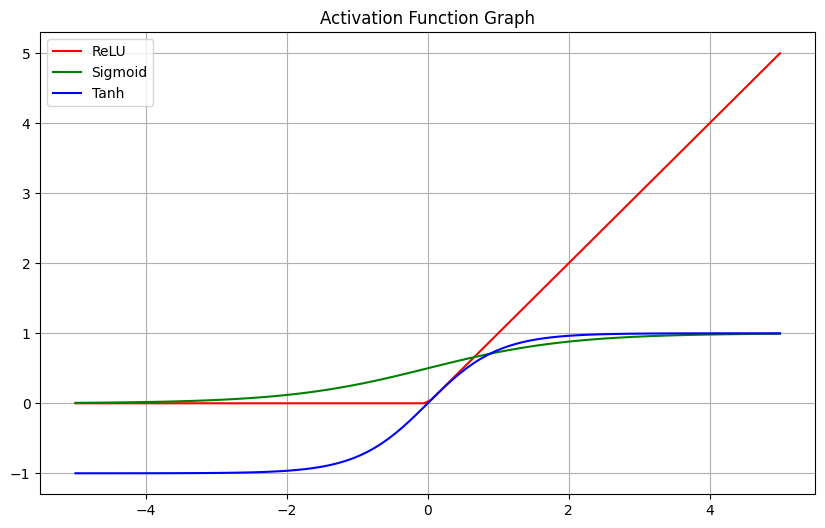

In [20]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
x=torch.linspace(-5,5,steps=100)

#Activation Function

relu=F.relu(x)
sigmoid=torch.sigmoid(x)
tanh=torch.tanh(x)

#ploting

plt.figure(figsize=(10,6))

plt.plot(x,relu,label='ReLU',color='red')
plt.plot(x,sigmoid,label='Sigmoid',color='green')
plt.plot(x,tanh,label='Tanh',color='blue')

plt.title("Activation Function Graph")
plt.legend()
plt.grid(True)
plt.show()

ReLU: সব negative value কে 0 বানায়, এবং positive value 그대로 রাখে

Sigmoid: সব input কে 0 থেকে 1 এর মধ্যে ফিট করে

Tanh: সব input কে -1 থেকে +1 এর মধ্যে রাখে, তাই centered হয়



In [5]:
#ReLu with Titanic Dataset

from google.colab import files
upl=files.upload()
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df=pd.read_csv('titanic.csv')
df.head(2)

# Encode categorical values
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

#drop rows with missing values

df=df.dropna(subset=['Age','Embarked'])

# Features and labels
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = df[features].values
y = df['Survived'].values

scaler=StandardScaler()
X=scaler.fit_transform(X)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

#convert to tensor

X_train=torch.tensor(X_train,dtype=torch.float32)
X_test=torch.tensor(X_test,dtype=torch.float32)
y_train=torch.tensor(y_train)
y_test=torch.tensor(y_test)


class ReLU_CE_Model(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1=nn.Linear(len(features),32)
    self.fc2=nn.Linear(32,2)

  def forward(self,x):
    x=F.relu(self.fc1(x))
    return self.fc2(x)

model=ReLU_CE_Model()
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.01)

#Training Loop
for epoch in range(200):
  logits=model(X_train)
  loss=loss_fn(logits,y_train)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  if(epoch+1)%50==0:
    print(f"[CE] Epoch {epoch+1},Loss: {loss.item():.4f}")






Saving titanic.csv to titanic (2).csv
[CE] Epoch 50,Loss: 0.3846
[CE] Epoch 100,Loss: 0.3486
[CE] Epoch 150,Loss: 0.3234
[CE] Epoch 200,Loss: 0.3075
[CE] Epoch 250,Loss: 0.2937
[CE] Epoch 300,Loss: 0.2796
[CE] Epoch 350,Loss: 0.2639
[CE] Epoch 400,Loss: 0.2516
[CE] Epoch 450,Loss: 0.2445
[CE] Epoch 500,Loss: 0.2395
[CE] Epoch 550,Loss: 0.2352
[CE] Epoch 600,Loss: 0.2308
[CE] Epoch 650,Loss: 0.2269
[CE] Epoch 700,Loss: 0.2232
[CE] Epoch 750,Loss: 0.2197
[CE] Epoch 800,Loss: 0.2161
[CE] Epoch 850,Loss: 0.2133
[CE] Epoch 900,Loss: 0.2111
[CE] Epoch 950,Loss: 0.2079
[CE] Epoch 1000,Loss: 0.2052
[CE] Epoch 1050,Loss: 0.2030
[CE] Epoch 1100,Loss: 0.2018
[CE] Epoch 1150,Loss: 0.2002
[CE] Epoch 1200,Loss: 0.1984
[CE] Epoch 1250,Loss: 0.1962
[CE] Epoch 1300,Loss: 0.1940
[CE] Epoch 1350,Loss: 0.1923
[CE] Epoch 1400,Loss: 0.1913
[CE] Epoch 1450,Loss: 0.1902
[CE] Epoch 1500,Loss: 0.1887
[CE] Epoch 1550,Loss: 0.1877
[CE] Epoch 1600,Loss: 0.1864
[CE] Epoch 1650,Loss: 0.1857
[CE] Epoch 1700,Loss: 0.1

In [8]:
with torch.no_grad():
    preds = model(X_test)
    predicted_labels = torch.argmax(preds, dim=1)
    acc = (predicted_labels == y_test).float().mean()
    print(f"[CE] Accuracy: {acc.item()*100:.2f}%")


[CE] Accuracy: 75.52%


In [11]:
#ReLU + Sigmoid + BCELoss Model (Binary Style)
class Sigmoid_BCE_Model(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1=nn.Linear(len(features),32)
    self.fc2=nn.Linear(32,1)

  def forward(self,x):
    x=F.relu(self.fc1(x))
    return torch.sigmoid(self.fc2(x))

model2=Sigmoid_BCE_Model()
loss_fn=nn.BCELoss()
optimizer=torch.optim.Adam(model2.parameters(),lr=0.01)

y_train_float=y_train.float().unsqueeze(1)#Shape(N,1)
y_test_float=y_test.float().unsqueeze(1)

#Training Loop

for epoch in range(200):
  prob=model2(X_train)
  loss=loss_fn(prob,y_train_float)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  if (epoch+1)%50==0:

    print(f"[BCE] Epoch {epoch+1},Loss: {loss.item():.4f}")




[BCE] Epoch 50,Loss: 0.3842
[BCE] Epoch 100,Loss: 0.3610
[BCE] Epoch 150,Loss: 0.3418
[BCE] Epoch 200,Loss: 0.3237


In [12]:
#Accuracy Check
with torch.no_grad():
    probs = model2(X_test)
    predicted_labels = (probs > 0.5).long()
    acc = (predicted_labels == y_test_float).float().mean()
    print(f"[BCE] Accuracy: {acc.item()*100:.2f}%")


[BCE] Accuracy: 79.02%


In [25]:
#Tanh Model

class TanhModel(nn.Module):


 def __init__(self):
  super().__init__()
  self.fc1=nn.Linear(len(features),32)
  self.fc2=nn.Linear(32,1)

 def forward(self,x):
  x=torch.tanh(self.fc1(x))
  x=torch.sigmoid(self.fc2(x))
  return x

model3=TanhModel()
loss_fn=nn.BCELoss()
optimizer=torch.optim.Adam(model3.parameters(),lr=0.01)

#make sure y_train ise float and (N,1)

y_train_float=y_train.float().unsqueeze(1)
y_test_float=y_test.float().unsqueeze(1)

#Training Loop

for epoch in range(200):
  prob=model3(X_train)
  loss=loss_fn(prob,y_train_float)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  if (epoch+1)%50==0:
     print(f"[Tanh+BCE] Epoch {epoch+1}, Loss: {loss.item():.4f}")




[Tanh+BCE] Epoch 50, Loss: 0.4140
[Tanh+BCE] Epoch 100, Loss: 0.3756
[Tanh+BCE] Epoch 150, Loss: 0.3406
[Tanh+BCE] Epoch 200, Loss: 0.3181


In [26]:
#Accuracy
with torch.no_grad():
    test_probs = model(X_test)
    predictions = (test_probs > 0.5).long()
    acc = (predictions == y_test_float).float().mean()
    print(f"[Tanh+BCE] Accuracy: {acc.item()*100:.2f}%")


[Tanh+BCE] Accuracy: 47.90%
